In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('road_train.csv')

In [3]:
train_df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [4]:
test_df = pd.read_csv('road_test.csv')

In [5]:
test_df



,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,rural,2,0.01,45,dim,rainy,False,False,afternoon,True,True,2
172581,690335,rural,1,0.74,70,daylight,foggy,False,True,afternoon,False,False,2
172582,690336,urban,2,0.14,70,dim,clear,False,False,evening,True,True,1
172583,690337,urban,1,0.09,45,daylight,foggy,True,True,morning,False,True,0


In [6]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [7]:
df.isnull().sum()

id                             0
road_type                      0
num_lanes                      0
curvature                      0
speed_limit                    0
lighting                       0
weather                        0
road_signs_present             0
public_road                    0
time_of_day                    0
holiday                        0
school_season                  0
num_reported_accidents         0
accident_risk             172585
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690339 entries, 0 to 690338
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      690339 non-null  int64  
 1   road_type               690339 non-null  object 
 2   num_lanes               690339 non-null  int64  
 3   curvature               690339 non-null  float64
 4   speed_limit             690339 non-null  int64  
 5   lighting                690339 non-null  object 
 6   weather                 690339 non-null  object 
 7   road_signs_present      690339 non-null  bool   
 8   public_road             690339 non-null  bool   
 9   time_of_day             690339 non-null  object 
 10  holiday                 690339 non-null  bool   
 11  school_season           690339 non-null  bool   
 12  num_reported_accidents  690339 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [9]:
df['road_type'].unique()

array(['urban', 'rural', 'highway'], dtype=object)

we can do label encoding on raod type

In [10]:
df['lighting'].unique()

array(['daylight', 'dim', 'night'], dtype=object)

label encoding needed

In [11]:
df['weather'].unique()

array(['rainy', 'clear', 'foggy'], dtype=object)

In [12]:
df['time_of_day'].unique()

array(['afternoon', 'evening', 'morning'], dtype=object)

## Label encoding does not work as model will treat diffrent attribute in same  way according to thier ranking (urban>rural>highway) i don't want that so i'use one hot encoding to treat diffrent attributs diffrently 

In [13]:
df = pd.get_dummies(
    df,
    columns=['road_type', 'lighting','weather','time_of_day'],
    drop_first=True
)


In [14]:
df.head()

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,False,True,False,True,1,0.13,False,True,False,False,False,True,False,False
1,1,4,0.99,35,True,False,True,True,0,0.35,False,True,False,False,False,False,True,False
2,2,4,0.63,70,False,True,True,False,2,0.30,True,False,True,False,False,False,False,True
3,3,4,0.07,35,True,True,False,False,1,0.21,False,False,True,False,False,True,False,True
4,4,1,0.58,60,False,False,True,False,1,0.56,True,False,False,False,True,False,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690339 entries, 0 to 690338
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      690339 non-null  int64  
 1   num_lanes               690339 non-null  int64  
 2   curvature               690339 non-null  float64
 3   speed_limit             690339 non-null  int64  
 4   road_signs_present      690339 non-null  bool   
 5   public_road             690339 non-null  bool   
 6   holiday                 690339 non-null  bool   
 7   school_season           690339 non-null  bool   
 8   num_reported_accidents  690339 non-null  int64  
 9   accident_risk           517754 non-null  float64
 10  road_type_rural         690339 non-null  bool   
 11  road_type_urban         690339 non-null  bool   
 12  lighting_dim            690339 non-null  bool   
 13  lighting_night          690339 non-null  bool   
 14  weather_foggy       

In [16]:
df.drop('id',axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690339 entries, 0 to 690338
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               690339 non-null  int64  
 1   curvature               690339 non-null  float64
 2   speed_limit             690339 non-null  int64  
 3   road_signs_present      690339 non-null  bool   
 4   public_road             690339 non-null  bool   
 5   holiday                 690339 non-null  bool   
 6   school_season           690339 non-null  bool   
 7   num_reported_accidents  690339 non-null  int64  
 8   accident_risk           517754 non-null  float64
 9   road_type_rural         690339 non-null  bool   
 10  road_type_urban         690339 non-null  bool   
 11  lighting_dim            690339 non-null  bool   
 12  lighting_night          690339 non-null  bool   
 13  weather_foggy           690339 non-null  bool   
 14  weather_rainy       

<Axes: xlabel='curvature', ylabel='accident_risk'>

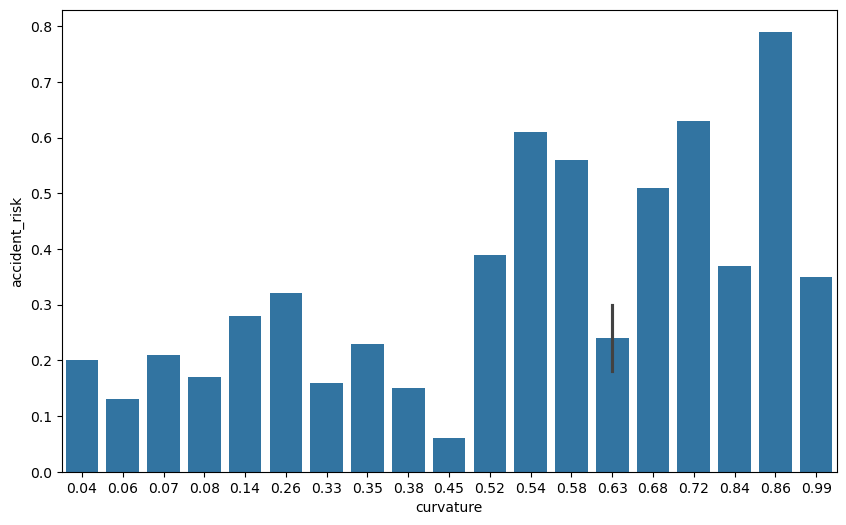

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=('curvature'),y= 'accident_risk',data= df.iloc[:20])

<Axes: xlabel='curvature', ylabel='accident_risk'>

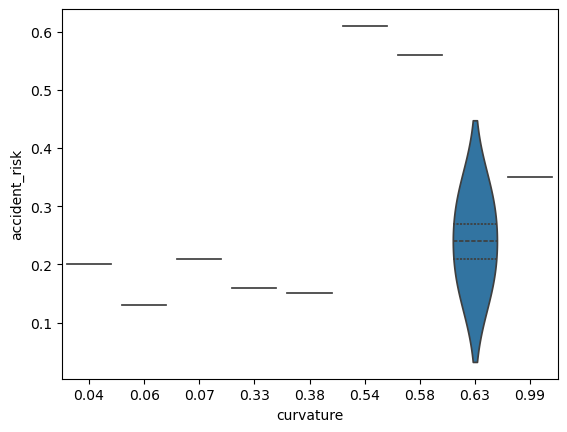

In [19]:
sns.violinplot(x='curvature', y='accident_risk', data=df.iloc[:10], inner='quartile')


In [20]:
# Separate labeled and unlabeled data
train_df = df[df['accident_risk'].notna()]
test_df  = df[df['accident_risk'].isna()]

In [21]:
# Features and target
X = train_df.drop(columns=['accident_risk', 'num_reported_accidents'])
y = train_df['accident_risk']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [23]:
#X = X.drop(columns=['num_reported_accidents'])


In [50]:
#from sklearn.pipeline import Pipeline
#from sklearn.ensemble import RandomForestRegressor
#pipeline_1 = Pipeline([
    
    #('model', RandomForestRegressor(
        #n_estimators=200,
        #random_state=42,
        #n_jobs=-1
    #))
#])

In [51]:
#pipeline_1.fit(X_train,y_train)

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [52]:
#y_prep= pipeline_1.predict(X_test)

In [53]:
#pd.DataFrame({
 #   'Actual': y_test,
  #  'Predicted': y_prep
#}).#head()

,Actual,Predicted
50309,0.15,0.129575
95219,0.20,0.339918
197653,0.29,0.285517
111236,0.25,0.336447
147247,0.32,0.298002


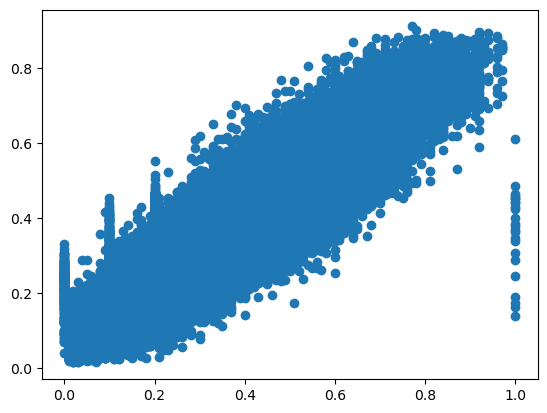

In [54]:
#plt.scatter(y_test, y_prep)

In [55]:
#from sklearn.utils import shuffle

#y_shuffled = shuffle(y, random_state=42)
#pipeline_1.fit(X_train, y_shuffled.loc[X_train.index])
#pipeline_1.score(X_test, y_test)


0.8414116435426693

In [58]:
print(os.getcwd())

C:\Users\lenovo


In [60]:
import os
print(os.path.abspath("model/model.pkl"))


C:\Users\lenovo\model\model.pkl


In [63]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [64]:

xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [65]:
y_prep= xgb_model.predict(X_test)

In [67]:

pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_prep
}).head()

,Actual,Predicted
50309,0.15,0.130581
95219,0.20,0.327662
197653,0.29,0.260842
111236,0.25,0.290320
147247,0.32,0.326750


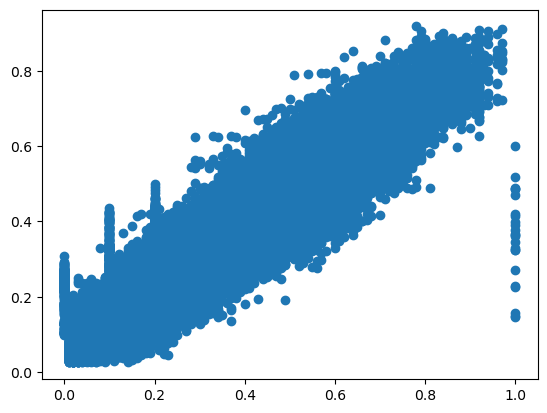

In [68]:
plt.scatter(y_test, y_prep)

In [69]:
os.makedirs("model", exist_ok=True)
joblib.dump(xgb_model, "model/model.pkl", compress=3)

['model/model.pkl']

In [70]:

import os
print(os.path.getsize("model/model.pkl") / (1024**2), "MB")

0.4092903137207031 MB
